### **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Loading Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ramadan Series Marathon_ What’s on Your Watchlist_.csv to Ramadan Series Marathon_ What’s on Your Watchlist_ (11).csv


In [ ]:
df = pd.read_csv('Ramadan Series Marathon_ What’s on Your Watchlist_.csv')
df.head()

,Timestamp,What is your age group?,What is your gender?,How many Ramadan series do you typically watch during the month?\n,"On average, how many episodes of Ramadan series do you watch per day?\n",What time of day do you usually watch Ramadan series?,Which Ramadan series have you watched this year?,On which platforms do you watch Ramadan series? (Select all that apply),"Do you discuss Ramadan series with others (e.g., family, friends, or on social media)?"
0,2025/03/06 10:43:43 PM GMT+2,18–24,Male,2,1,Late night,اشغال شقه جدا;كامل العدد ++,Shahid;WatchIt,Sometimes
1,2025/03/06 10:43:47 PM GMT+2,18–24,Female,2,1,Afternoon,ولاد الشمس;كامل العدد ++,Shahid;WatchIt,"Yes, often"
2,2025/03/06 10:47:52 PM GMT+2,18–24,Male,3,2–3,Afternoon,اشغال شقه جدا;كامل العدد ++,Other apps,"Yes, often"
3,2025/03/06 10:48:14 PM GMT+2,18–24,Male,3,2–3,Late night,اشغال شقه جدا;النص;ولاد الشمس,Yango Play,Sometimes
4,2025/03/06 10:48:56 PM GMT+2,18–24,Male,2,2–3,Late night,ولاد الشمس;المداح,Live TV,Sometimes


## **Cleaning**

1. I will delete unnecessary and non-helpful columns

In [ ]:
del df['Timestamp']
del df['What time of day do you usually watch Ramadan series?']
del df['Do you discuss Ramadan series with others (e.g., family, friends, or on social media)?']
df.head()

,What is your age group?,What is your gender?,How many Ramadan series do you typically watch during the month?\n,"On average, how many episodes of Ramadan series do you watch per day?\n",Which Ramadan series have you watched this year?,On which platforms do you watch Ramadan series? (Select all that apply)
0,18–24,Male,2,1,اشغال شقه جدا;كامل العدد ++,Shahid;WatchIt
1,18–24,Female,2,1,ولاد الشمس;كامل العدد ++,Shahid;WatchIt
2,18–24,Male,3,2–3,اشغال شقه جدا;كامل العدد ++,Other apps
3,18–24,Male,3,2–3,اشغال شقه جدا;النص;ولاد الشمس,Yango Play
4,18–24,Male,2,2–3,ولاد الشمس;المداح,Live TV


2. Renaming Row Titles:

In [ ]:
df.columns = df.columns.str.strip()

df.rename(columns={
    'What is your age group?': 'Age Group',
    'What is your gender?': 'Gender',
    'How many Ramadan series do you typically watch during the month?': 'Series Count',
    'On average, how many episodes of Ramadan series do you watch per day?': 'episodes/day',
    'What time of day do you usually watch Ramadan series?': 'Time of Watching',
    'Which Ramadan series have you watched this year?': 'Series Watched',
    'On which platforms do you watch Ramadan series? (Select all that apply)': 'platforms'
}, inplace=True)

df.head()

,Age Group,Gender,Series Count,episodes/day,Series Watched,platforms
0,18–24,Male,2,1,اشغال شقه جدا;كامل العدد ++,Shahid;WatchIt
1,18–24,Female,2,1,ولاد الشمس;كامل العدد ++,Shahid;WatchIt
2,18–24,Male,3,2–3,اشغال شقه جدا;كامل العدد ++,Other apps
3,18–24,Male,3,2–3,اشغال شقه جدا;النص;ولاد الشمس,Yango Play
4,18–24,Male,2,2–3,ولاد الشمس;المداح,Live TV


In [ ]:
df.isnull().sum()

,0
Age Group,0
Gender,0
Series Count,0
episodes/day,0
Series Watched,19
platforms,3


3. Replacing all null with "None" since there are people who do not watch any series

In [ ]:
df['Series Watched'].fillna(0, inplace=True)
df['platforms'].fillna('None', inplace=True)
df.isnull().sum()

<ipython-input-251-c0ef052b07c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Series Watched'].fillna(0, inplace=True)
<ipython-input-251-c0ef052b07c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Age Group,0
Gender,0
Series Count,0
episodes/day,0
Series Watched,0
platforms,0


4. Split several input data into a list of strings for easier access

In [ ]:
df['Series Watched'] = df['Series Watched'].str.split(', ')
series = df['Series Watched'].explode()
seriesFrequency = series.value_counts()
print(seriesFrequency)

Series Watched
اشغال شقه جدا;كامل العدد ++                                            10
اشغال شقه جدا                                                           9
كامل العدد ++                                                           6
اشغال شقه جدا;ولاد الشمس                                                6
اشغال شقه جدا;ولاد الشمس;كامل العدد ++                                  5
ولاد الشمس                                                              2
اشغال شقه جدا;اخواتي                                                    2
ولاد الشمس;كامل العدد ++;                                               2
اشغال شقه جدا;ولاد الشمس;كامل العدد ++;المداح                           2
اشغال شقه جدا;النص;ولاد الشمس;كامل العدد ++;المداح                      2
اشغال شقه جدا;العتاولة                                                  2
ولاد الشمس;كامل العدد ++                                                1
None;                                                                   1
النص;كامل العدد ++     

In [ ]:
df['Series Watched'].fillna(0, inplace=True)
df.isnull().sum()

<ipython-input-253-e61ccf3ccf5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Series Watched'].fillna(0, inplace=True)


,0
Age Group,0
Gender,0
Series Count,0
episodes/day,0
Series Watched,0
platforms,0


In [ ]:
df['platforms'] = df['platforms'].str.split(', ')
platform = df['platforms'].explode()
platformFrequency = platform.value_counts()
print(platformFrequency)

platforms
Shahid;WatchIt               18
Live TV                      16
Shahid                       11
Shahid;WatchIt;Yango Play     7
none                          5
WatchIt                       5
Shahid;WatchIt;Live TV        4
None                          3
Shahid;Live TV                3
Shahid;Yango Play             2
WatchIt;Live TV               2
Yango Play                    1
Other apps                    1
Google                        1
Iptv                          1
i don’t watch                 1
IPTV                          1
Live TV;iptv                  1
i don't really watch any      1
Name: count, dtype: int64


## **Measures Of Central Tendencies**

In [ ]:
print(df.columns)

Index(['Age Group', 'Gender', 'Series Count', 'episodes/day', 'Series Watched',
       'platforms'],
      dtype='object')


1. Calculate the mean mode and median in the regular way to the appropriate data sets (quantitative data)

In [ ]:
def calculate_stats(series):
    series = pd.to_numeric(series.astype(str).str.extract(r'(\d+)')[0], errors='coerce')
    return series.mean(), series.median(), series.mode()[0] if not series.mode().empty else None

series_stats = calculate_stats(df['Series Count'])
episodes_stats = calculate_stats(df['episodes/day'])

print(f"Series Count - Mean: {series_stats[0]:.2f}, Median: {series_stats[1]}, Mode: {series_stats[2]}")
print(f"Episodes per Day - Mean: {episodes_stats[0]:.2f}, Median: {episodes_stats[1]}, Mode: {episodes_stats[2]}")

Series Count - Mean: 1.74, Median: 2.0, Mode: 2
Episodes per Day - Mean: 1.43, Median: 1.0, Mode: 2


2. create a dictionary to save the counts of categorical data sets, so I can use the counts in a any numerical calculations or graphs, use the above function to calculate the mode for each column

In [ ]:
counts_dict = {}
for column in df.columns:
    counts_dict[column] = df[column].value_counts()

stats_data = []
for column, counts in counts_dict.items():
    mode = counts.idxmax()
    stats_data.append({'Column': column, 'Mode': mode})

stats_df = pd.DataFrame(stats_data)
print("\nStatistics for Counts:")
print(stats_df)


Statistics for Counts:
           Column              Mode
0       Age Group             18-24
1          Gender              Male
2    Series Count                 2
3    episodes/day               2–3
4  Series Watched                 0
5       platforms  [Shahid;WatchIt]


## **Visual Representations**

I will create a bar chart that represet


<ipython-input-229-5ca3ec16e97a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


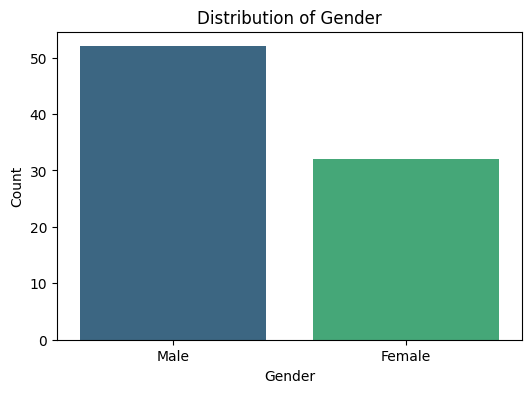

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-230-802c2cf56351>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='magma', order=df['Age Group'].value_counts().index)


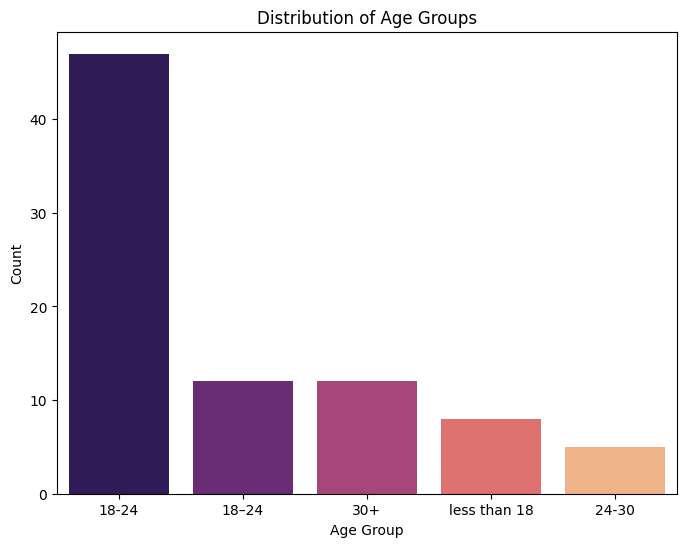

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Group', data=df, palette='magma', order=df['Age Group'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

This step is crucial just for the graph to be more representative

In [ ]:
def replace_in_list(lst):
    return [
        s.replace('كامل العدد', 'Kamel El Adad')
        .replace('اشغال شقه جدا', "Ashghal Sha'a Gedan")
        .replace('ولاد الشمس', 'Welad El Shams')
        for s in lst
    ]
df['Series Watched'] = df['Series Watched'].apply(lambda x: replace_in_list(x) if isinstance(x, list) else x)
print(df['Series Watched'].explode().unique())

["Ashghal Sha'a Gedan;Kamel El Adad ++" 'Welad El Shams;Kamel El Adad ++'
 "Ashghal Sha'a Gedan;النص;Welad El Shams" 'Welad El Shams;المداح'
 'النص;Kamel El Adad ++' 0 'Kamel El Adad ++'
 "Ashghal Sha'a Gedan;Welad El Shams;Kamel El Adad ++"
 "Ashghal Sha'a Gedan;Welad El Shams" "Ashghal Sha'a Gedan"
 "Ashghal Sha'a Gedan;اخواتي" 'Welad El Shams' 'None;'
 "Ashghal Sha'a Gedan;Kamel El Adad ++;80 bako" 'الكابتن '
 "Ashghal Sha'a Gedan;النص" "Ashghal Sha'a Gedan;Kamel El Adad ++;80باكو"
 'النص;سيد الناس' 'اثينا' 'المداح' 'رامز '
 'Welad El Shams;Kamel El Adad ++;المداح'
 "Ashghal Sha'a Gedan;Welad El Shams;Kamel El Adad ++;المداح"
 "Ashghal Sha'a Gedan;النص;Welad El Shams;Kamel El Adad ++;المداح"
 "Ashghal Sha'a Gedan;Welad El Shams;Kamel El Adad ++;المداح;80 bako - seed el nas"
 "Ashghal Sha'a Gedan;النص;المداح" 'Welad El Shams;Kamel El Adad ++;'
 "Ashghal Sha'a Gedan;Welad El Shams;العتاولة "
 "Ashghal Sha'a Gedan;العتاولة "]


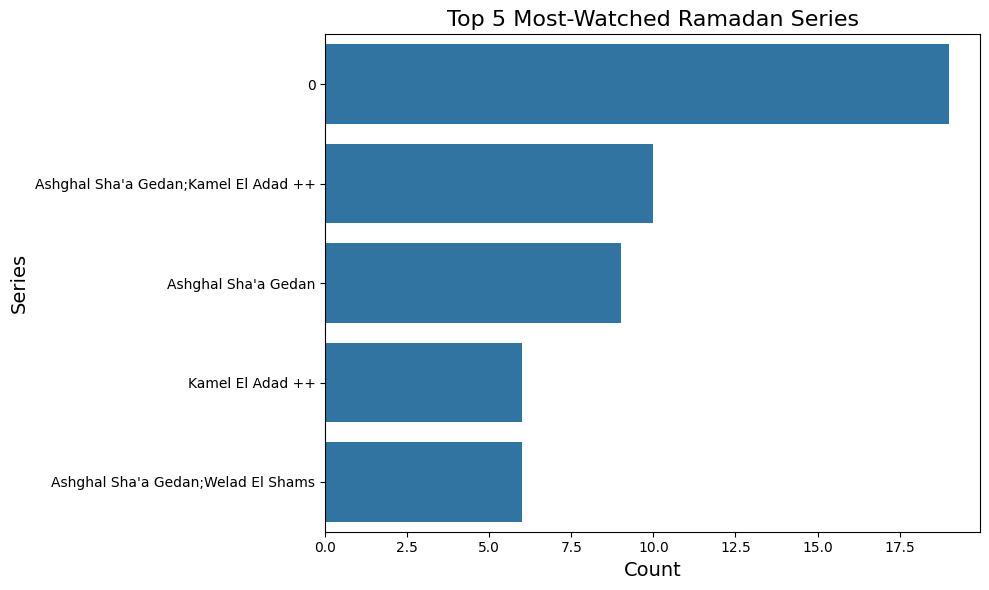

In [ ]:
exploded_series = df['Series Watched'].explode()
series_counts = exploded_series.value_counts()
top_5_series = series_counts.nlargest(5)
top_5_df = exploded_series[exploded_series.isin(top_5_series.index)].to_frame()
plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
sns.countplot(data=top_5_df, y='Series Watched', color=base_color, order=top_5_series.index)
plt.title('Top 5 Most-Watched Ramadan Series', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Series', fontsize=14)
plt.tight_layout()
plt.show()

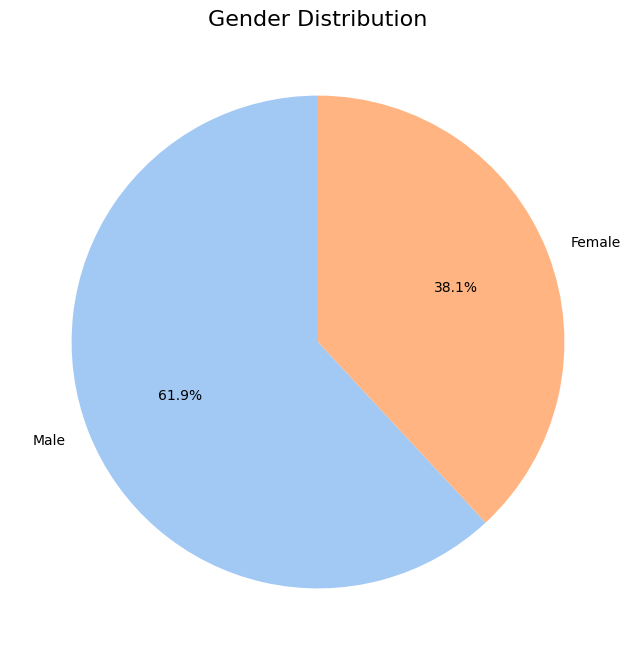

In [ ]:
plt.figure(figsize=(8, 8))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16  )
plt.show()

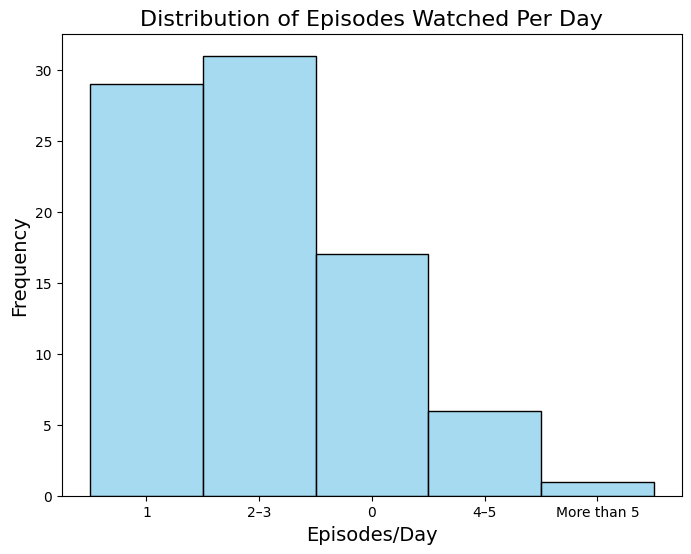

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['episodes/day'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Episodes Watched Per Day', fontsize=16)
plt.xlabel('Episodes/Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

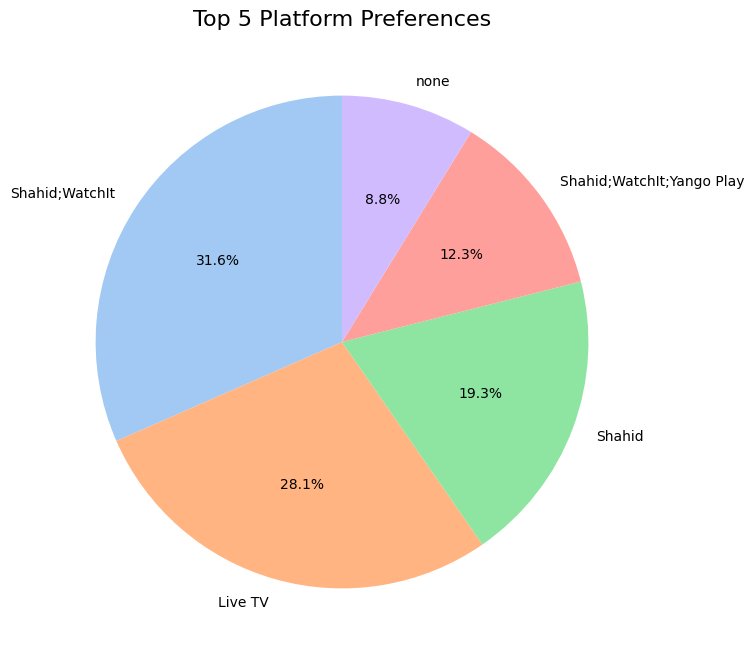

In [ ]:
exploded_platforms = df['platforms'].explode()
platform_counts = exploded_platforms.value_counts()
top_5_platforms = platform_counts.nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_5_platforms, labels=top_5_platforms.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top 5 Platform Preferences', fontsize=16)
plt.show()

<ipython-input-259-68a8f404dd0b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y= hello, data=df, palette='coolwarm', ci=None)
<ipython-input-259-68a8f404dd0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y= hello, data=df, palette='coolwarm', ci=None)


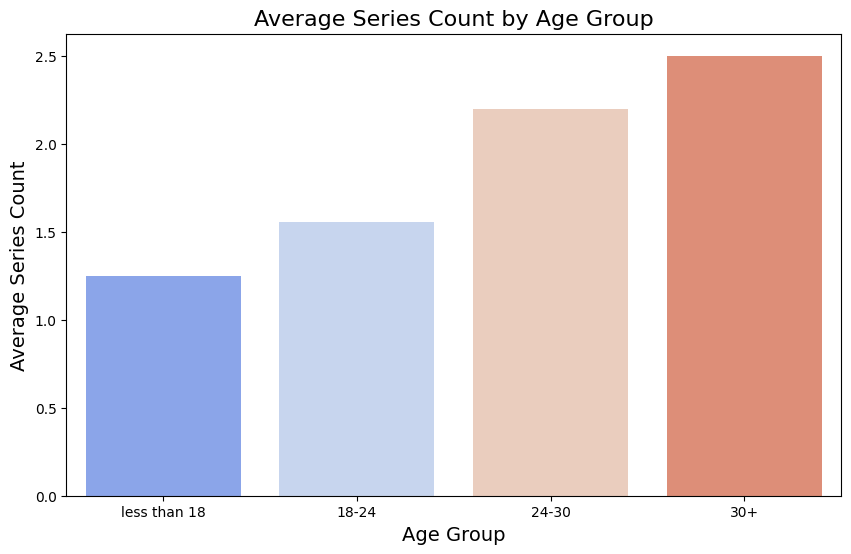

In [ ]:
df['Age Group'] = pd.Categorical(df['Age Group'], categories=['less than 18', '18-24', '24-30', '30+'], ordered=True)
hello = df['Series Count'].replace('4+', '4').astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y= hello, data=df, palette='coolwarm', ci=None)
plt.title('Average Series Count by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Series Count', fontsize=14)
plt.show()

# **Confidence Interval**

In [ ]:
exploded_series = df['Series Watched'].explode()

series_counts = exploded_series.value_counts()
top_5_series = series_counts.nlargest(5)

total_respondents = len(df)

def calculate_confidence_interval(counts, total_respondents):
    """Calculate 95% confidence interval for proportions."""
    proportion = counts / total_respondents
    std_error = np.sqrt((proportion * (1 - proportion)) / total_respondents)

    lower, upper = stats.norm.interval(0.95, loc=proportion, scale=std_error)

    return lower * total_respondents, upper * total_respondents

results = {
    series: {
        'Count': count,
        '95% CI': calculate_confidence_interval(count, total_respondents)
    }
    for series, count in top_5_series.items()
}

for series, values in results.items():
    print(f"Series: {series}")
    print(f"Count: {values['Count']}")
    print(f"95% Confidence Interval (approximate count range): {values['95% CI']}")
    print("-" * 30)


Series: 0
Count: 19
95% Confidence Interval (approximate count range): (np.float64(11.484776051591735), np.float64(26.515223948408266))
------------------------------
Series: اشغال شقه جدا;كامل العدد ++
Count: 10
95% Confidence Interval (approximate count range): (np.float64(4.182661867811863), np.float64(15.817338132188137))
------------------------------
Series: اشغال شقه جدا
Count: 9
95% Confidence Interval (approximate count range): (np.float64(3.4440243409968994), np.float64(14.555975659003101))
------------------------------
Series: كامل العدد ++
Count: 6
95% Confidence Interval (approximate count range): (np.float64(1.3737257507167215), np.float64(10.626274249283277))
------------------------------
Series: اشغال شقه جدا;ولاد الشمس
Count: 6
95% Confidence Interval (approximate count range): (np.float64(1.3737257507167215), np.float64(10.626274249283277))
------------------------------
